# **La esencia del cliente**

---
La junta directiva de la cadena de supermercados Universal Food ha observado una estabilización en sus ventas y busca comprender **cómo mejorar la relación con sus clientes**, entendiendo sus hábitos de compra, para **ofrecerles un servicio de mayor calidad**. **El objetivo es proporcionarles una experiencia de compra más personalizada, rápida y efectiva.**

proyecto: https://www.kaggle.com/datasets/ramjasmaurya/medias-cost-prediction-in-foodmart

---

# 1.Configuración del Ambiente

In [1]:
# modulos y bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# conectar cuenta de google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 2.Obtención de los datos

In [3]:
# cost.csv
URI = '/content/drive/MyDrive/Data_Science/Bootcamp Data Science/Challenge/ESENCIA DEL CLIENTE /media prediction and its cost.csv'
df = pd.read_csv(URI)
df.head()

,food_category,food_department,food_family,store_sales(in millions),store_cost(in millions),unit_sales(in millions),promotion_name,sales_country,marital_status,gender,...,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,media_type,cost
0,Breakfast Foods,Frozen Foods,Food,7.36,2.7232,4.0,Bag Stuffers,USA,M,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",126.62
1,Breakfast Foods,Frozen Foods,Food,5.52,2.5944,3.0,Cash Register Lottery,USA,M,M,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",59.86
2,Breakfast Foods,Frozen Foods,Food,3.68,1.3616,2.0,High Roller Savings,USA,S,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",84.16
3,Breakfast Foods,Frozen Foods,Food,3.68,1.1776,2.0,Cash Register Lottery,USA,M,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,In-Store Coupon,95.78
4,Breakfast Foods,Frozen Foods,Food,4.08,1.4280,3.0,Double Down Sale,USA,M,M,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,Radio,50.79


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60428 entries, 0 to 60427
Data columns (total 40 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   food_category               60428 non-null  object 
 1   food_department             60428 non-null  object 
 2   food_family                 60428 non-null  object 
 3   store_sales(in millions)    60428 non-null  float64
 4   store_cost(in millions)     60428 non-null  float64
 5   unit_sales(in millions)     60428 non-null  float64
 6   promotion_name              60428 non-null  object 
 7   sales_country               60428 non-null  object 
 8   marital_status              60428 non-null  object 
 9   gender                      60428 non-null  object 
 10  total_children              60428 non-null  float64
 11  education                   60428 non-null  object 
 12  member_card                 60428 non-null  object 
 13  occupation                  604

## Traducir DataFrame df

In [5]:
categoria_alimento = {
    'Vegetables': 'Vegetales',
    'Snack Foods': 'Alimentos para picar',
    'Dairy': 'Productos lácteos',
    'Meat': 'Carne',
    'Fruit': 'Fruta',
    'Jams and Jellies': 'Mermeladas y jaleas',
    'Baking Goods': 'Productos para hornear',
    'Breakfast Foods': 'Alimentos para el desayuno',
    'Bread': 'Pan',
    'Canned Soup': 'Sopa enlatada',
    'Beer and Wine': 'Cerveza y vino',
    'Paper Products': 'Productos de papel',
    'Bathroom Products': 'Productos de baño',
    'Electrical': 'Eléctrico',
    'Candy': 'Dulces',
    'Frozen Desserts': 'Postres congelados',
    'Specialty': 'Especialidades',
    'Starchy Foods': 'Alimentos ricos en almidón',
    'Magazines': 'Revistas',
    'Kitchen Products': 'Productos de cocina',
    'Eggs': 'Huevos',
    'Hot Beverages': 'Bebidas calientes',
    'Hygiene': 'Higiene',
    'Pain Relievers': 'Analgésicos',
    'Pizza': 'Pizza',
    'Carbonated Beverages': 'Bebidas carbonatadas',
    'Pure Juice Beverages': 'Bebidas de jugo puro',
    'Cleaning Supplies': 'Suministros de limpieza',
    'Side Dishes': 'Acompañamientos',
    'Frozen Entrees': 'Platos preparados congelados',
    'Drinks': 'Bebidas',
    'Plastic Products': 'Productos de plástico',
    'Hardware': 'Artículos de ferretería',
    'Cold Remedies': 'Remedios para el resfriado',
    'Decongestants': 'Descongestionantes',
    'Canned Tuna': 'Atún enlatado',
    'Seafood': 'Mariscos',
    'Canned Anchovies': 'Anchoas enlatadas',
    'Canned Clams': 'Almejas enlatadas',
    'Candles': 'Velas',
    'Miscellaneous': 'Misceláneos',
    'Canned Oysters': 'Ostras enlatadas',
    'Canned Shrimp': 'Camarones enlatados',
    'Packaged Vegetables': 'Vegetales envasados',
    'Canned Sardines': 'Sardinas enlatadas'
}

departamento = {
    'Produce': 'Productos frescos',
    'Snack Foods': 'Alimentos para picar',
    'Household': 'Artículos para el hogar',
    'Frozen Foods': 'Alimentos congelados',
    'Baking Goods': 'Productos para hornear',
    'Canned Foods': 'Alimentos enlatados',
    'Dairy': 'Productos lácteos',
    'Health and Hygiene': 'Salud e higiene',
    'Beverages': 'Bebidas',
    'Deli': 'Charcutería',
    'Baked Goods': 'Productos horneados',
    'Alcoholic Beverages': 'Bebidas alcohólicas',
    'Snacks': 'Snacks',
    'Starchy Foods': 'Alimentos ricos en almidón',
    'Periodicals': 'Publicaciones periódicas',
    'Eggs': 'Huevos',
    'Breakfast Foods': 'Alimentos para el desayuno',
    'Canned Products': 'Productos enlatados',
    'Checkout': 'Caja de salida',
    'Meat': 'Carne',
    'Seafood': 'Mariscos',
    'Carousel': 'Carrusel'
}

tipo= {'Food':'Comida', 'Non-Consumable':'No comestible', 'Drink':'Bebida'}

promocion = {
    'Weekend Markdown': 'Descuento de fin de semana',
    'Two Day Sale': 'Venta de dos días',
    'Price Savers': 'Ahorro de precios',
    'Price Winners': 'Ganadores de precios',
    'Save-It Sale': 'Venta Ahorra Ya',
    'Super Duper Savers': 'Super Ahorradores',
    'Super Savers': 'Super Ahorro',
    'One Day Sale': 'Venta de un día',
    'Double Down Sale': 'Venta Doble',
    'High Roller Savings': 'Ahorro para apostadores grandes',
    'Green Light Days': 'Días de luz verde',
    'Shelf Clearing Days': 'Días de liquidación de estanterías',
    'Price Slashers': 'Rebajadores de precios',
    'Free For All': 'Gratis para todos',
    'Cash Register Lottery': 'Lotería de la caja registradora',
    'Go For It': 'Adelante',
    'Two for One': 'Dos por uno',
    'Money Savers': 'Ahorradores de dinero',
    'Big Time Discounts': 'Descuentos de gran magnitud',
    'Price Destroyers': 'Destructores de precios',
    'Saving Days': 'Días de ahorro',
    'Dollar Cutters': 'Recortadores de dólares',
    'Unbeatable Price Savers': 'Ahorro de precios imbatible',
    'Sales Galore': 'Promociones por montones',
    'Big Promo': 'Gran promoción',
    'Dimes Off': 'Más barato',
    'Sales Days': 'Días de venta',
    'Price Cutters': 'Rebajando precios',
    'You Save Days': 'Días de ahorro',
    'Savings Galore': 'Ahorros por montones',
    'Bag Stuffers': 'Bolsas llenas',
    'Three for One': 'Tres por uno',
    'I Cant Believe It Sale': 'Venta No Puedo Creerlo',
    'Sale Winners': 'Ganadores de ventas',
    'Pick Your Savings': 'Elige tus ahorros',
    'Bye Bye Baby': 'Adiós bebé',
    'Best Savings': 'Mejores ahorros',
    'Tip Top Savings': 'Ahorro de primera clase',
    'Shelf Emptiers': 'Estantes vacíos',
    'Big Time Savings': 'Ahorro Enorme',
    'Wallet Savers': 'Ahorradores de billetera',
    'Dollar Days': 'Días de dólar',
    'Mystery Sale': 'Venta misteriosa',
    'Price Smashers': 'Aplastadores de precios',
    'Green Light Special': 'Especial luz verde',
    'Coupon Spectacular': 'Espectacular de cupones',
    'Super Wallet Savers': 'Super ahorradores de billetera',
    'Double Your Savings': 'Duplica tus ahorros',
    'Fantastic Discounts': 'Descuentos fantásticos'
}

escolaridad = {
    'Partial High School':'Primaria',
    'High School Degree':'Secundaria',
    'Bachelors Degree':'Superior',
    'Partial College':'Técnico',
    'Graduate Degree':'Maestría'
}

miembro = {
    'Bronze':'Bronce',
    'Golden': 'Oro',
    'Silver':'Plata'
}

ocupacion = {
    'Professional':'Profesional',
    'Skilled Manual':'Técnico',
    'Manual':'Obrero',
    'Management':'Gestión',
    'Clerical':'Cargo de Oficina'
}

pais = {
    'USA':'Estados Unidos',
    'Mexico':'México',
    'Canada':'Canadá'
}

estado_civil = {
    'S':'Soltero', 'M':'Casado'
}

genero ={
    'F':'Femenino',
    'M':'Masculino'
}

vivienda_propia={'Y':'Sí', 'N':'No'}

ingreso_anual={
    '$30K - $50K':40000,
    '$10K - $30K':20000,
    '$50K - $70K':60000,
    '$70K - $90K':80000,
    '$130K - $150K':140000,
    '$90K - $110K':100000,
    '$110K - $130K':120000,
    '$150K +':160000
}



comercio = {
    'Supermarket': 'Supermercado',
    'Deluxe Supermarket': 'Supermercado de lujo',
    'Gourmet Supermarket': 'Supermercado gourmet',
    'Mid-Size Grocery': 'Supermercado mediano',
    'Small Grocery': 'Pequeño supermercado'
}


divulgacion = {
    'Daily Paper, Radio': 'Periódico diario, radio',
    'Product Attachment': 'Anexo del producto',
    'Daily Paper, Radio, TV': 'Periódico diario, radio, televisión',
    'Daily Paper': 'Periódico diario',
    'Street Handout': 'Panfletos',
    'Radio': 'Radio',
    'Sunday Paper': 'Periódico dominical',
    'In-Store Coupon': 'Cupón en la tienda',
    'Sunday Paper, Radio': 'Periódico dominical, radio',
    'Cash Register Handout': 'Entrega en el punto de venta',
    'TV': 'Televisión',
    'Bulk Mail': 'Correo masivo',
    'Sunday Paper, Radio, TV': 'Periódico dominical, radio, televisión'
}

# Diccionario para traducior columnas
columnas = {
    'food_category': 'categoria_alimento',
    'food_department': 'departamento',
    'food_family': 'tipo',
    'store_sales(in millions)': 'ventas_tienda(en millones)',
    'store_cost(in millions)': 'costo_tienda(en millones)',
    'unit_sales(in millions)': 'ventas_unitarias(en millones)',
    'promotion_name': 'promocion',
    'sales_country': 'pais',
    'marital_status': 'estado_civil',
    'gender': 'genero',
    'total_children': 'total_de_hijos',
    'education': 'escolaridad',
    'member_card': 'miembro',
    'occupation': 'ocupacion',
    'houseowner': 'vivienda_propia',
    'avg_cars_at home(approx)': 'promedio_autos(aprox)',
    'avg. yearly_income': 'ingreso_anual',
    'num_children_at_home': 'numero_hijos',
    'avg_cars_at home(approx).1': 'promedio_autos(aprox)',
    'brand_name': 'marca',
    'SRP': 'precio_recomendado',
    'gross_weight': 'peso_bruto',
    'net_weight': 'peso_neto',
    'recyclable_package': 'empaque_reciclable',
    'low_fat': 'bajo_en_grasa',
    'units_per_case': 'unidades_por_caja',
    'store_type': 'comercio',
    'store_city': 'ciudad',
    'store_state': 'estado',
    'store_sqft': 'pies_cuadrados_tienda',
    'grocery_sqft': 'pies_cuadrados_comestibles',
    'frozen_sqft': 'pies_cuadrados_congelados',
    'meat_sqft': 'pies_cuadrados_carne',
    'coffee_bar': 'cafeteria',
    'video_store': 'tienda_de_videos',
    'salad_bar': 'barra_de_ensaladas',
    'prepared_food': 'comida_preparada',
    'florist': 'floristeria',
    'media_type': 'divulgacion',
    'cost': 'costo'
}

In [6]:
# copia de df
datos_raw = df.copy()

### Traducir filas

In [7]:
nombres_diccionarios = ['categoria_alimento', 'departamento', 'tipo', 'promocion', 'escolaridad', 'miembro',
                        'ocupacion', 'pais', 'estado_civil', 'genero', 'vivienda_propia', 'ingreso_anual', 'comercio', 'divulgacion']
nombres_columnas = []

# Buscar las claves para cada valor en la lista 'nombres_diccionarios' del diccionario clumnas
for valor in nombres_diccionarios:
    for clave, val in columnas.items():
        if val == valor:
            nombres_columnas.append(clave)

print(nombres_columnas)

['food_category', 'food_department', 'food_family', 'promotion_name', 'education', 'member_card', 'occupation', 'sales_country', 'marital_status', 'gender', 'houseowner', 'avg. yearly_income', 'store_type', 'media_type']


In [8]:
# traduccir filas del dataFrame(datos)
for col, dic in zip(nombres_columnas, nombres_diccionarios):
    mapeado = eval(dic)
    datos_raw[col] = datos_raw[col].map(mapeado)
datos_raw.head()

,food_category,food_department,food_family,store_sales(in millions),store_cost(in millions),unit_sales(in millions),promotion_name,sales_country,marital_status,gender,...,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,media_type,cost
0,Alimentos para el desayuno,Alimentos congelados,Comida,7.36,2.7232,4.0,Bolsas llenas,Estados Unidos,Casado,Femenino,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Periódico diario, radio",126.62
1,Alimentos para el desayuno,Alimentos congelados,Comida,5.52,2.5944,3.0,Lotería de la caja registradora,Estados Unidos,Casado,Masculino,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Periódico diario, radio",59.86
2,Alimentos para el desayuno,Alimentos congelados,Comida,3.68,1.3616,2.0,Ahorro para apostadores grandes,Estados Unidos,Soltero,Femenino,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Periódico diario, radio",84.16
3,Alimentos para el desayuno,Alimentos congelados,Comida,3.68,1.1776,2.0,Lotería de la caja registradora,Estados Unidos,Casado,Femenino,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,Cupón en la tienda,95.78
4,Alimentos para el desayuno,Alimentos congelados,Comida,4.08,1.4280,3.0,Venta Doble,Estados Unidos,Casado,Masculino,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,Radio,50.79


### Traducir columnas

In [9]:
# tradicir nombre columnas del dataframe (datos)
datos_raw.rename(columns=columnas, inplace=True)
datos_raw.head()

,categoria_alimento,departamento,tipo,ventas_tienda(en millones),costo_tienda(en millones),ventas_unitarias(en millones),promocion,pais,estado_civil,genero,...,pies_cuadrados_comestibles,pies_cuadrados_congelados,pies_cuadrados_carne,cafeteria,tienda_de_videos,barra_de_ensaladas,comida_preparada,floristeria,divulgacion,costo
0,Alimentos para el desayuno,Alimentos congelados,Comida,7.36,2.7232,4.0,Bolsas llenas,Estados Unidos,Casado,Femenino,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Periódico diario, radio",126.62
1,Alimentos para el desayuno,Alimentos congelados,Comida,5.52,2.5944,3.0,Lotería de la caja registradora,Estados Unidos,Casado,Masculino,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Periódico diario, radio",59.86
2,Alimentos para el desayuno,Alimentos congelados,Comida,3.68,1.3616,2.0,Ahorro para apostadores grandes,Estados Unidos,Soltero,Femenino,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Periódico diario, radio",84.16
3,Alimentos para el desayuno,Alimentos congelados,Comida,3.68,1.1776,2.0,Lotería de la caja registradora,Estados Unidos,Casado,Femenino,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,Cupón en la tienda,95.78
4,Alimentos para el desayuno,Alimentos congelados,Comida,4.08,1.4280,3.0,Venta Doble,Estados Unidos,Casado,Masculino,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,Radio,50.79


In [10]:
# exportar el Datadrame en csv
datos_raw.to_csv('/content/drive/MyDrive/Data_Science/Bootcamp Data Science/Challenge/ESENCIA DEL CLIENTE /costo_y_prediccion_de_medios.csv', index=False)

# 3.Exploración de los datos

## columnas Datos (español)
`categoria_alimento` -> tipos de comida

`departamento` -> "departamento de alimentos" o "departamento de alimentos y bebidas".

`tipo` -> "familia de alimentos" o "grupo de alimentos". Categorización más específica de los alimentos, como frutas, verduras, lácteos, carnes, etc.

`ventas_tienda(en millones)` -> ventas de la tienda en millones.

`costo_tienda(en millones)` -> "costo de la tienda" o "costo del establecimiento". "Gasto (en millones de dólares)".

`ventas_unitarias(en millones)`

`promocion` -> promociones realizadas en la tienda.

`pais` -> "país donde ocurre la venta" o "país donde tiene lugar la venta".

`estado_civil` -> estado civil del cliente.

`genero` -> género del cliente.

`total_de_hijos` -> "total de niños en el hogar" o "cantidad total de niños en el hogar" de los clientes.

`escolaridad` -> escolaridad del cliente.

`miembro` -> "tarjeta de socio disponible para el cliente" o "tarjeta de membresía disponible para el cliente". Tipo membresía cliente.

`ocupacion` -> tipo de ocupación del cliente.

`vivienda_propia` -> el cliente tiene vivienda propia?

`promedio_autos(aprox)` -> ¿cuántos autos tiene el cliente?

`ingreso_anual` -> "rango de ingresos anuales según los detalles proporcionados por los clientes" o "rango de ingresos anuales de acuerdo a los detalles proporcionados por los clientes".

`numero_hijos`

`promedio_autos(aprox)`

`marca` -> "nombre de la marca del producto" o simplemente "marca del producto".

`precio_recomendado` -> "precio de venta sugerido (SRP)" o "precio máximo de venta al público (MRP)" del artículo.

`peso_bruto` -> "peso bruto del artículo" o "peso total del artículo".

`peso_neto` -> "peso neto del artículo" o "peso neto del producto".

`empaque_reciclable` -> "el artículo alimenticio es envase reciclable".

`bajo_en_grasa`

`unidades_por_caja` -> "unidades/unidades por caja disponibles en cada estante de la tienda".

`comercio` -> "tipo de tienda disponible" o "tipo de establecimiento disponible".

`ciudad` -> "tienda disponible en la ciudad" o "tienda disponible en la localidad".

`estado` -> "tienda presente en qué estado" o "en qué estado se encuentra la tienda".

`pies_cuadrados_tienda` -> "área de la tienda disponible en pies cuadrados" o "área disponible de la tienda en pies cuadrados".

`pies_cuadrados_comestibles` -> "área de abarrotes disponible en pies cuadrados" o "área disponible de abarrotes en pies cuadrados".

`pies_cuadrados_congelados` -> "área de alimentos congelados disponible en pies cuadrados" o "área disponible de alimentos congelados en pies cuadrados".

`pies_cuadrados_carne` -> "área de carnes disponible en pies cuadrados" o "área disponible de carnes en pies cuadrados".

`cafeteria` -> "barra de café disponible en la tienda".

`tienda_de_videos` -> "tienda de videos/tienda de juegos disponible".

`barra_de_ensaladas` -> "barra de ensaladas disponible en la tienda".

`comida_preparada` -> "comida preparada disponible en la tienda" o "alimentos preparados disponibles en la tienda".

`floristeria` -> "estantes de flores disponibles en la tienda" o "estantes de flores disponibles en la tienda".

`divulgacion` -> "tipo de medio fuente de medios utilizada aquí".

`costo` -> "costo de adquisición de un cliente en dólares".

In [11]:
datos = pd.read_csv('/content/drive/MyDrive/Data_Science/Bootcamp Data Science/Challenge/ESENCIA DEL CLIENTE /costo_y_prediccion_de_medios.csv')

In [12]:
datos['miembro'].unique()

array([nan, 'Plata', 'Bronce', 'Oro'], dtype=object)

Al explorar la columna "miembro", notamos datos NaN. Al analizar los datos y ver que muchos clientes no se encuentran catalogados en ningún bloque ('Plata', 'Bronce', 'Oro'), podemos concluir que esos clientes no tienen una membresía.

Reemplazar NaN en la columna "miembro" por "no_miembro".




In [13]:
# cambiar nan por no_miebros
datos['miembro'] = datos['miembro'].fillna('no_miembro')

In [14]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60428 entries, 0 to 60427
Data columns (total 40 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   categoria_alimento             60428 non-null  object 
 1   departamento                   60428 non-null  object 
 2   tipo                           60428 non-null  object 
 3   ventas_tienda(en millones)     60428 non-null  float64
 4   costo_tienda(en millones)      60428 non-null  float64
 5   ventas_unitarias(en millones)  60428 non-null  float64
 6   promocion                      60428 non-null  object 
 7   pais                           60428 non-null  object 
 8   estado_civil                   60428 non-null  object 
 9   genero                         60428 non-null  object 
 10  total_de_hijos                 60428 non-null  float64
 11  escolaridad                    60428 non-null  object 
 12  miembro                        60428 non-null 

## preguntas sobre los datos

**¿Cuál es el rango de ingresos anuales de nuestros clientes?**

Esto puede ayudar a segmentar la base de clientes y adaptar las ofertas y promociones en consecuencia.

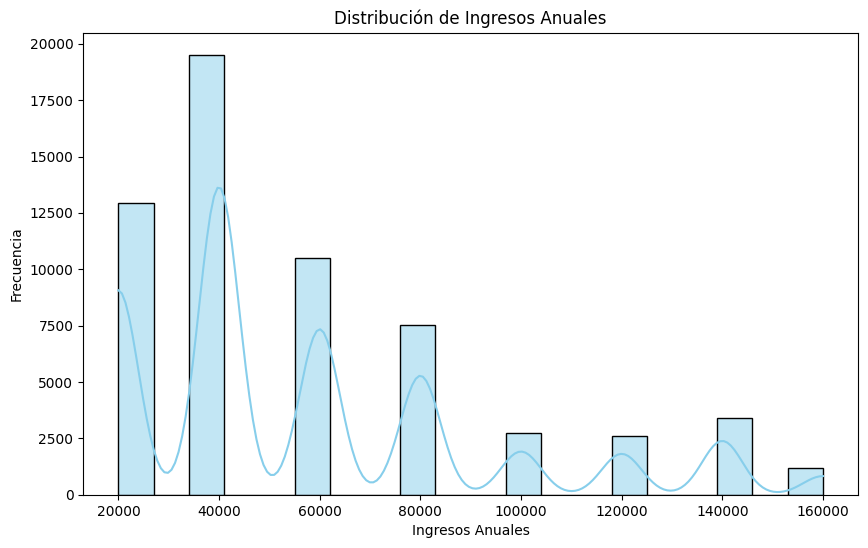

In [15]:
# Crear un histograma para visualizar la distribución de los ingresos anuales
plt.figure(figsize=(10, 6))
sns.histplot(datos['ingreso_anual'], bins=20, kde=True, color='skyblue')
plt.title('Distribución de Ingresos Anuales')
plt.xlabel('Ingresos Anuales')
plt.ylabel('Frecuencia')
plt.show()

In [16]:
def plot_ventas_por_categoria(datos, columna_categoria, columna_ventas):
    """
    Función para graficar las ventas por categoría.

    Parámetros:
    - columna_categoria: Nombre de la columna que contiene la categoría de interés.
    - columna_ventas: Nombre de la columna que contiene las ventas en millones.

    Retorna:
    - None
    """
    # Agrupar los datos por categoría y sumar las ventas
    ventas_por_categoria = datos.groupby(columna_categoria)[columna_ventas].sum().reset_index()

    # Ordenar los datos por cantidad de ventas de forma descendente
    ventas_por_categoria = ventas_por_categoria.sort_values(by=columna_ventas, ascending=False).head(10)

    # Crear el gráfico de barras
    plt.figure(figsize=(10, 6))
    sns.barplot(x=columna_ventas, y=columna_categoria, data=ventas_por_categoria, palette='hsv')
    plt.title('Ventas por {}'.format(columna_categoria))
    plt.xlabel('Ventas (en millones)')
    plt.ylabel(columna_categoria)
    plt.show()

In [17]:
def plot_categoria(datos, x, y, z):
    """
    Visualiza la relación entre tres categorías en un DataFrame utilizando Matplotlib y Seaborn.

    Parámetros:
    - datos: DataFrame que contiene los datos.
    - x: Nombre de la primera categoría (eje x).
    - y: Nombre de la segunda categoría (eje y).
    - z: Nombre de la tercera categoría (se representará con diferentes colores).
    """
    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 6))
    sns.barplot(x=x, y=y, hue=z, data=datos)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(f'Relación entre {x}, {y} y {z}')
    plt.legend(title=z)
    plt.show()




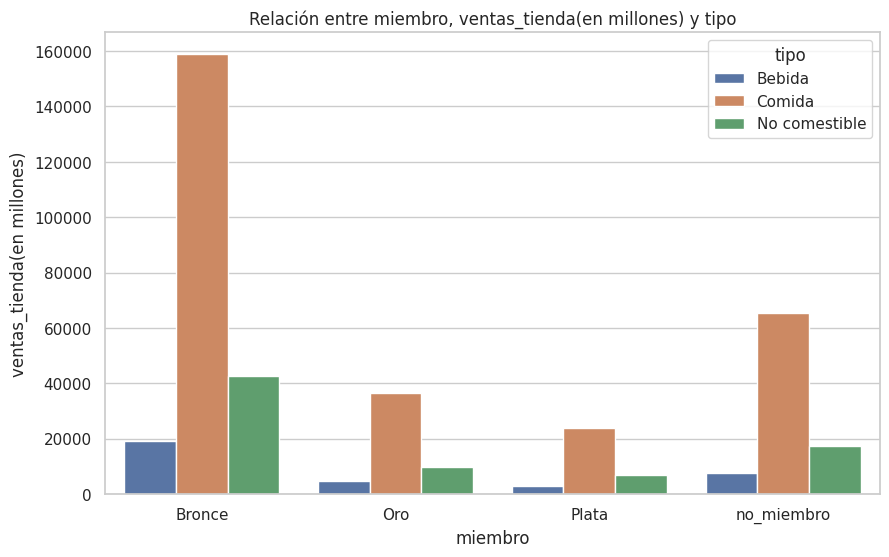

In [18]:
meb_ventas = datos.groupby(['miembro', 'tipo'])['ventas_tienda(en millones)'].sum().reset_index()
plot_categoria(meb_ventas, 'miembro', 'ventas_tienda(en millones)', 'tipo')

In [19]:
meb_ventas = datos.groupby(['categoria_alimento', 'tipo'])['ventas_tienda(en millones)'].sum().reset_index()
tipos = meb_ventas['tipo'].unique()
for tipo in tipos:
    categoria_tipo = meb_ventas.query('tipo == @tipo')
    top = categoria_tipo.nlargest(10, 'ventas_tienda(en millones)')
    print(f'Top 10 categorias de {tipo}:')
    print(top)
    print('\n')
    # plot_categoria(meb_ventas, 'categoria_alimento', 'ventas_tienda(en millones)', 'tipo')

Top 10 categorias de Comida:
            categoria_alimento    tipo  ventas_tienda(en millones)
44                   Vegetales  Comida                    50067.64
2         Alimentos para picar  Comida                    47726.96
14                       Carne  Comida                    21206.17
37           Productos lácteos  Comida                    20626.94
21                       Fruta  Comida                    20134.93
25         Mermeladas y jaleas  Comida                    15400.78
28                         Pan  Comida                    11813.05
1   Alimentos para el desayuno  Comida                    11328.06
38      Productos para hornear  Comida                    11313.59
42               Sopa enlatada  Comida                    10419.14


Top 10 categorias de No comestible:
         categoria_alimento           tipo  ventas_tienda(en millones)
18                Eléctrico  No comestible                    11147.72
34       Productos de papel  No comestible            

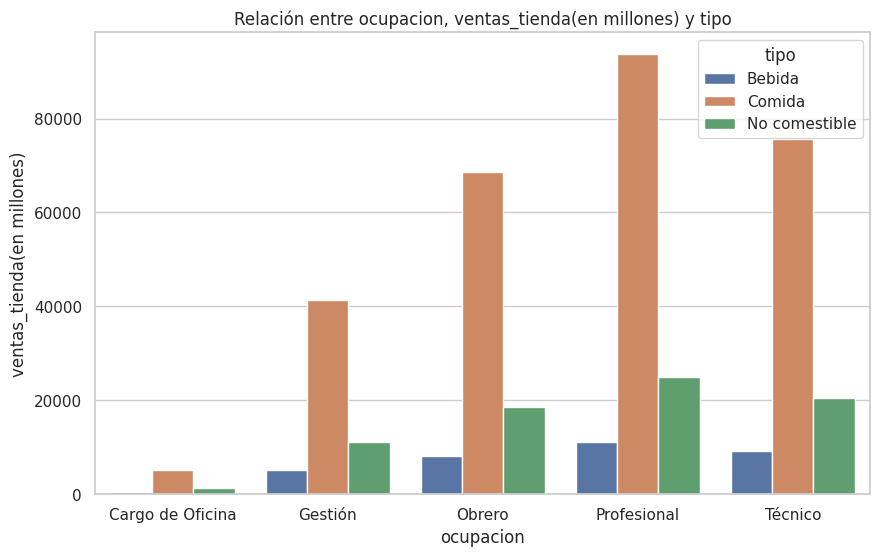

In [20]:
me_ventas = datos.groupby(['ocupacion', 'tipo'])['ventas_tienda(en millones)'].sum().reset_index()
plot_categoria(me_ventas, 'ocupacion', 'ventas_tienda(en millones)', 'tipo')

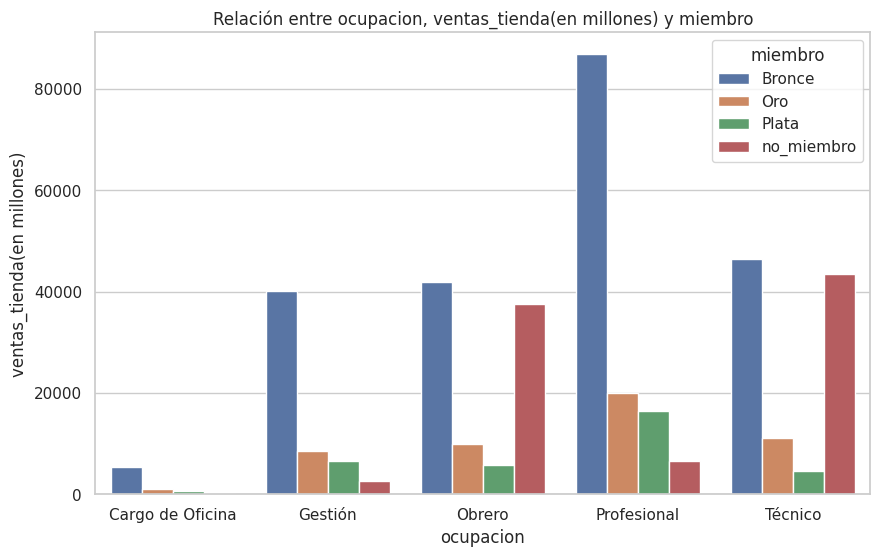

In [21]:
me_ventas = datos.groupby(['ocupacion', 'miembro'])['ventas_tienda(en millones)'].sum().reset_index()
plot_categoria(me_ventas, 'ocupacion', 'ventas_tienda(en millones)', 'miembro')

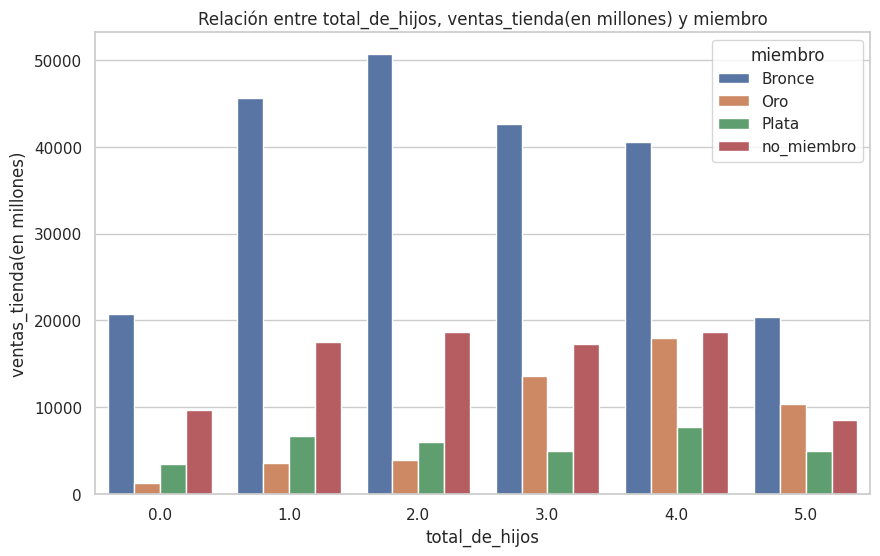

In [22]:
me_ventas = datos.groupby(['total_de_hijos', 'miembro'])['ventas_tienda(en millones)'].sum().reset_index()
plot_categoria(me_ventas, 'total_de_hijos', 'ventas_tienda(en millones)', 'miembro')

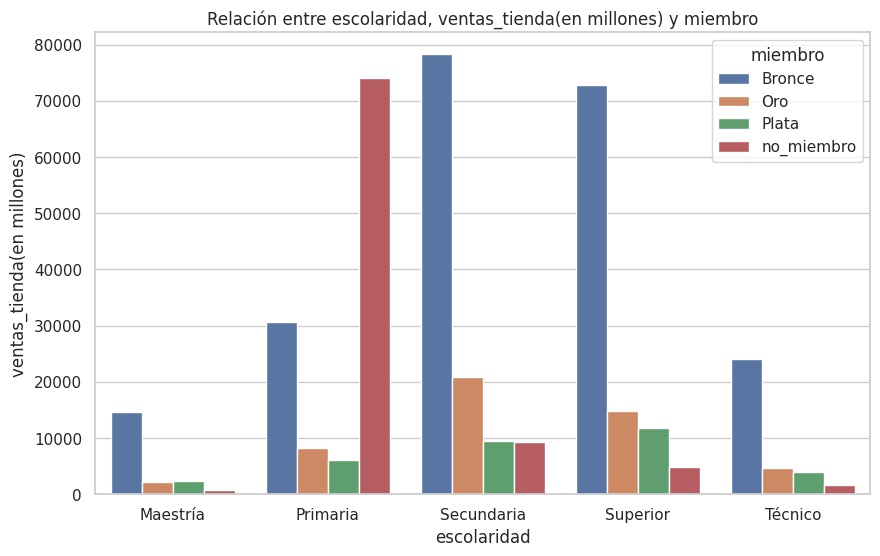

In [23]:
me_ventas = datos.groupby(['escolaridad', 'miembro'])['ventas_tienda(en millones)'].sum().reset_index()
plot_categoria(me_ventas, 'escolaridad', 'ventas_tienda(en millones)', 'miembro')

In [24]:
me_ventas = datos.groupby(['promocion', 'tipo'])['ventas_tienda(en millones)'].sum().reset_index()
tipos = me_ventas['tipo'].unique()
for tipo in tipos:
    prom_tipo = me_ventas[me_ventas['tipo'] == tipo]
    top = prom_tipo.nlargest(10, 'ventas_tienda(en millones)')
    print(f'Top 10 promociones de {tipo}:')
    print(top)
    print('\n')
    # plot_categoria(top, 'promocion', 'ventas_tienda(en millones)', 'tipo')

Top 10 promociones de Bebida:
                           promocion    tipo  ventas_tienda(en millones)
54                    Días de ahorro  Bebida                     1517.95
15                 Ahorro de precios  Bebida                     1373.74
135                Venta de dos días  Bebida                     1321.57
36        Descuento de fin de semana  Bebida                     1283.45
24   Ahorro para apostadores grandes  Bebida                     1125.52
81              Ganadores de precios  Bebida                     1103.45
114                Super Ahorradores  Bebida                     1090.19
138                  Venta de un día  Bebida                     1081.72
117                     Super Ahorro  Bebida                     1066.20
129                      Venta Doble  Bebida                     1042.09


Top 10 promociones de Comida:
                           promocion    tipo  ventas_tienda(en millones)
55                    Días de ahorro  Comida                  

**¿Ventas por genero ?**

<ipython-input-16-35702090de7d>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=columna_ventas, y=columna_categoria, data=ventas_por_categoria, palette='hsv')


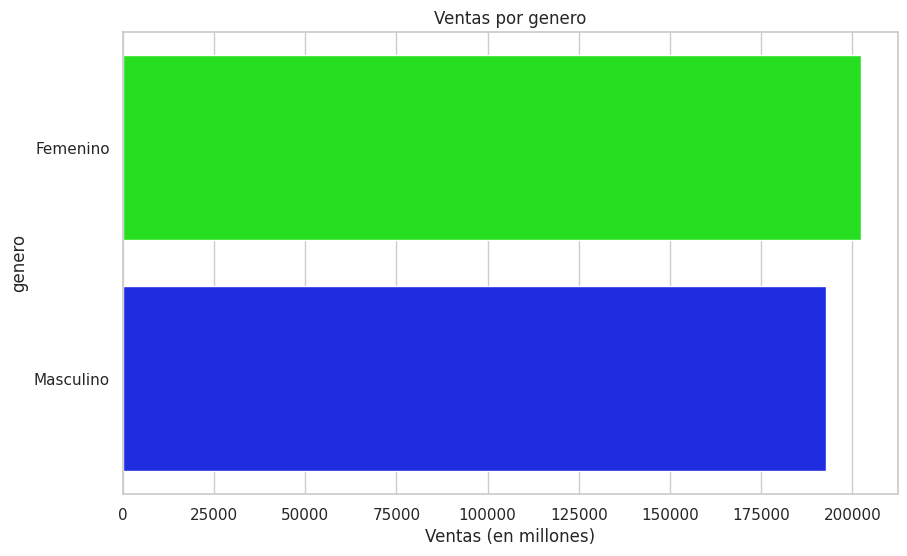

,ventas_tienda(en millones)
genero,
Femenino,202378.66
Masculino,192882.74


In [25]:
plot_ventas_por_categoria(datos, 'genero', 'ventas_tienda(en millones)')
datos.groupby(['genero'])['ventas_tienda(en millones)'].sum()

<ipython-input-16-35702090de7d>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=columna_ventas, y=columna_categoria, data=ventas_por_categoria, palette='hsv')


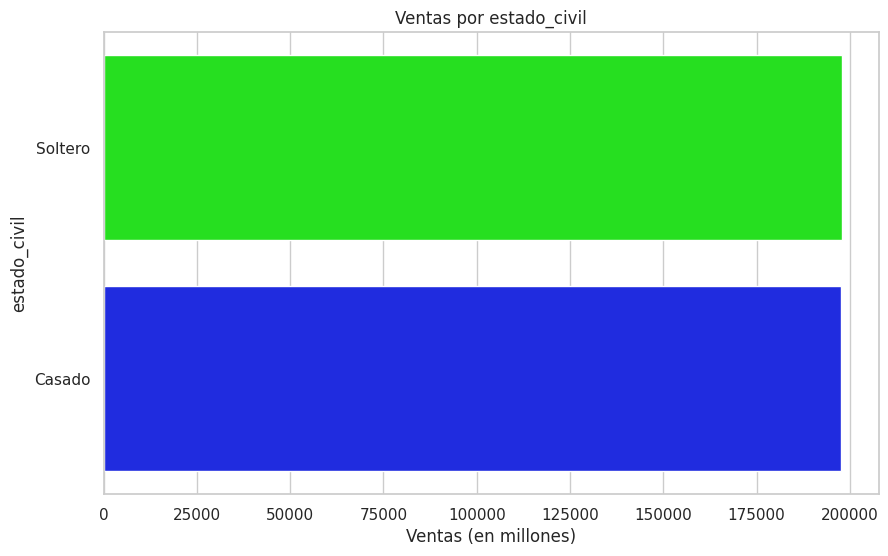

,count
estado_civil,
Soltero,30355
Casado,30073


In [26]:
plot_ventas_por_categoria(datos, 'estado_civil', 'ventas_tienda(en millones)')
datos['estado_civil'].value_counts()

**¿Cuáles son los tipos de comida más populares entre nuestros clientes?**

 Esto ayudaría a comprender las preferencias alimenticias y a garantizar una oferta adecuada de productos.

<ipython-input-16-35702090de7d>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=columna_ventas, y=columna_categoria, data=ventas_por_categoria, palette='hsv')


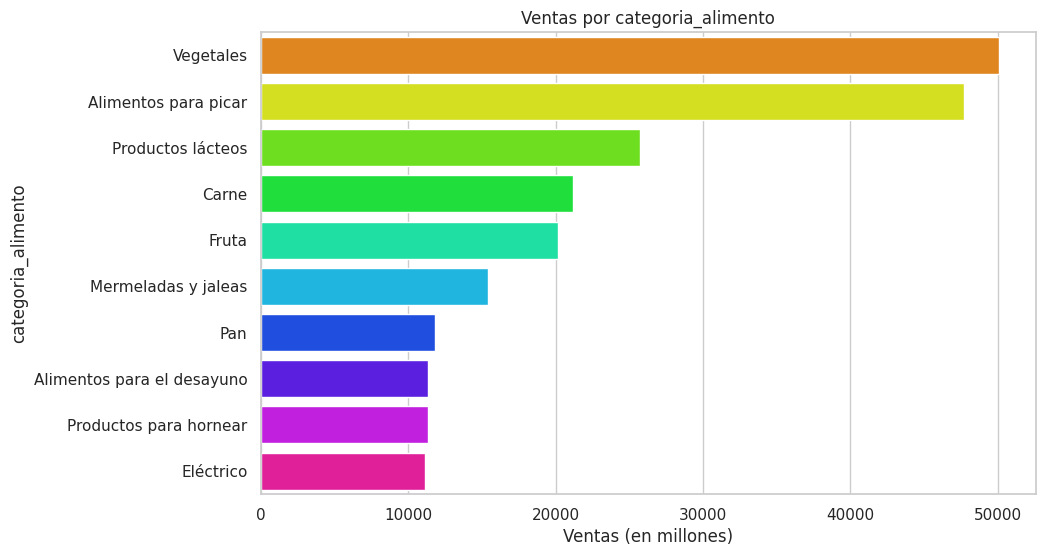

In [27]:
plot_ventas_por_categoria(datos, 'categoria_alimento', 'ventas_tienda(en millones)')

La mayor parte de las ventas en productos vejetales y alimentos para picar, la mayoria de productos son comunes en la cocina del hogar.

**¿En qué departamentos o áreas de la tienda se realizan más ventas?**

 Conocer esta información puede ayudar a optimizar el diseño de la tienda y la disposición de los productos.


<ipython-input-16-35702090de7d>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=columna_ventas, y=columna_categoria, data=ventas_por_categoria, palette='hsv')


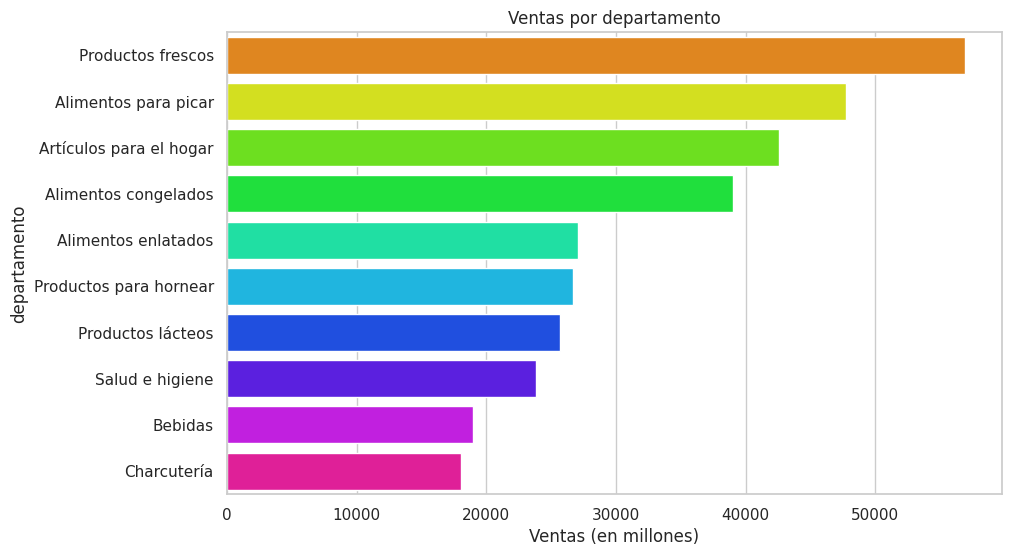

In [28]:
plot_ventas_por_categoria(datos, 'departamento', 'ventas_tienda(en millones)')

**¿Qué tipo de promociones son más efectivas en las tienda?**

 Entender qué promociones resuenan mejor con los clientes puede ayudar a diseñar estrategias de marketing más efectivas.

<ipython-input-16-35702090de7d>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=columna_ventas, y=columna_categoria, data=ventas_por_categoria, palette='hsv')


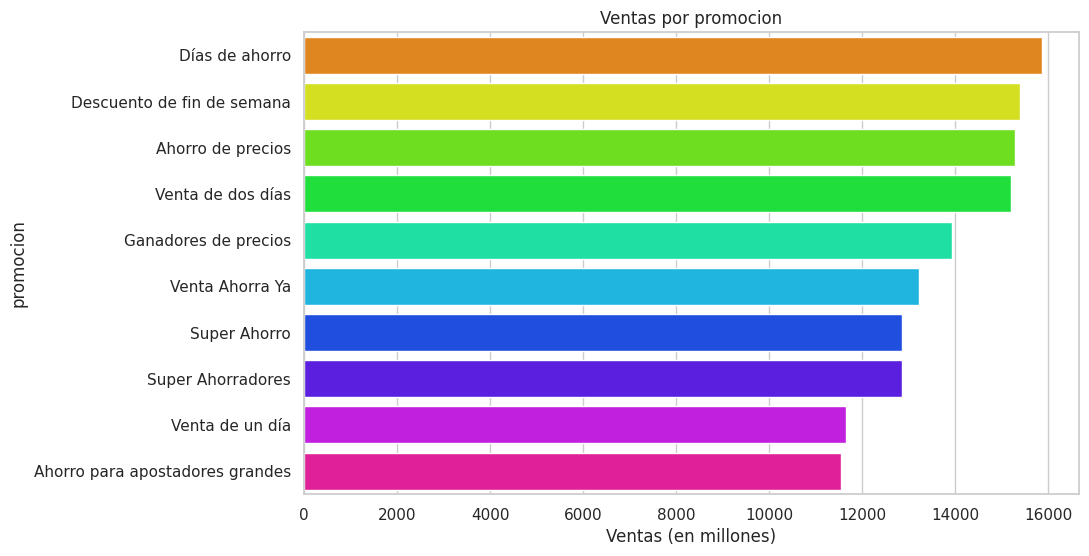

In [29]:
plot_ventas_por_categoria(datos, 'promocion', 'ventas_tienda(en millones)')

días de ahorro, descuentos de fin de semana, ahorro de precios, venta de dos dias, ganadores de precios

**¿Al cliente le gusta que la tienda cuente con cafeteria, tienda_de_videos, barra_de_ensaladas, comida_preparada, floristeria?**

 Esto nos ayudaría a evaluar si la presencia de estas secciones en las tiendas  está asociada con un aumento o una disminución en las ventas. lo cual poodria indicar que a los clientes les gustan estas secciones.


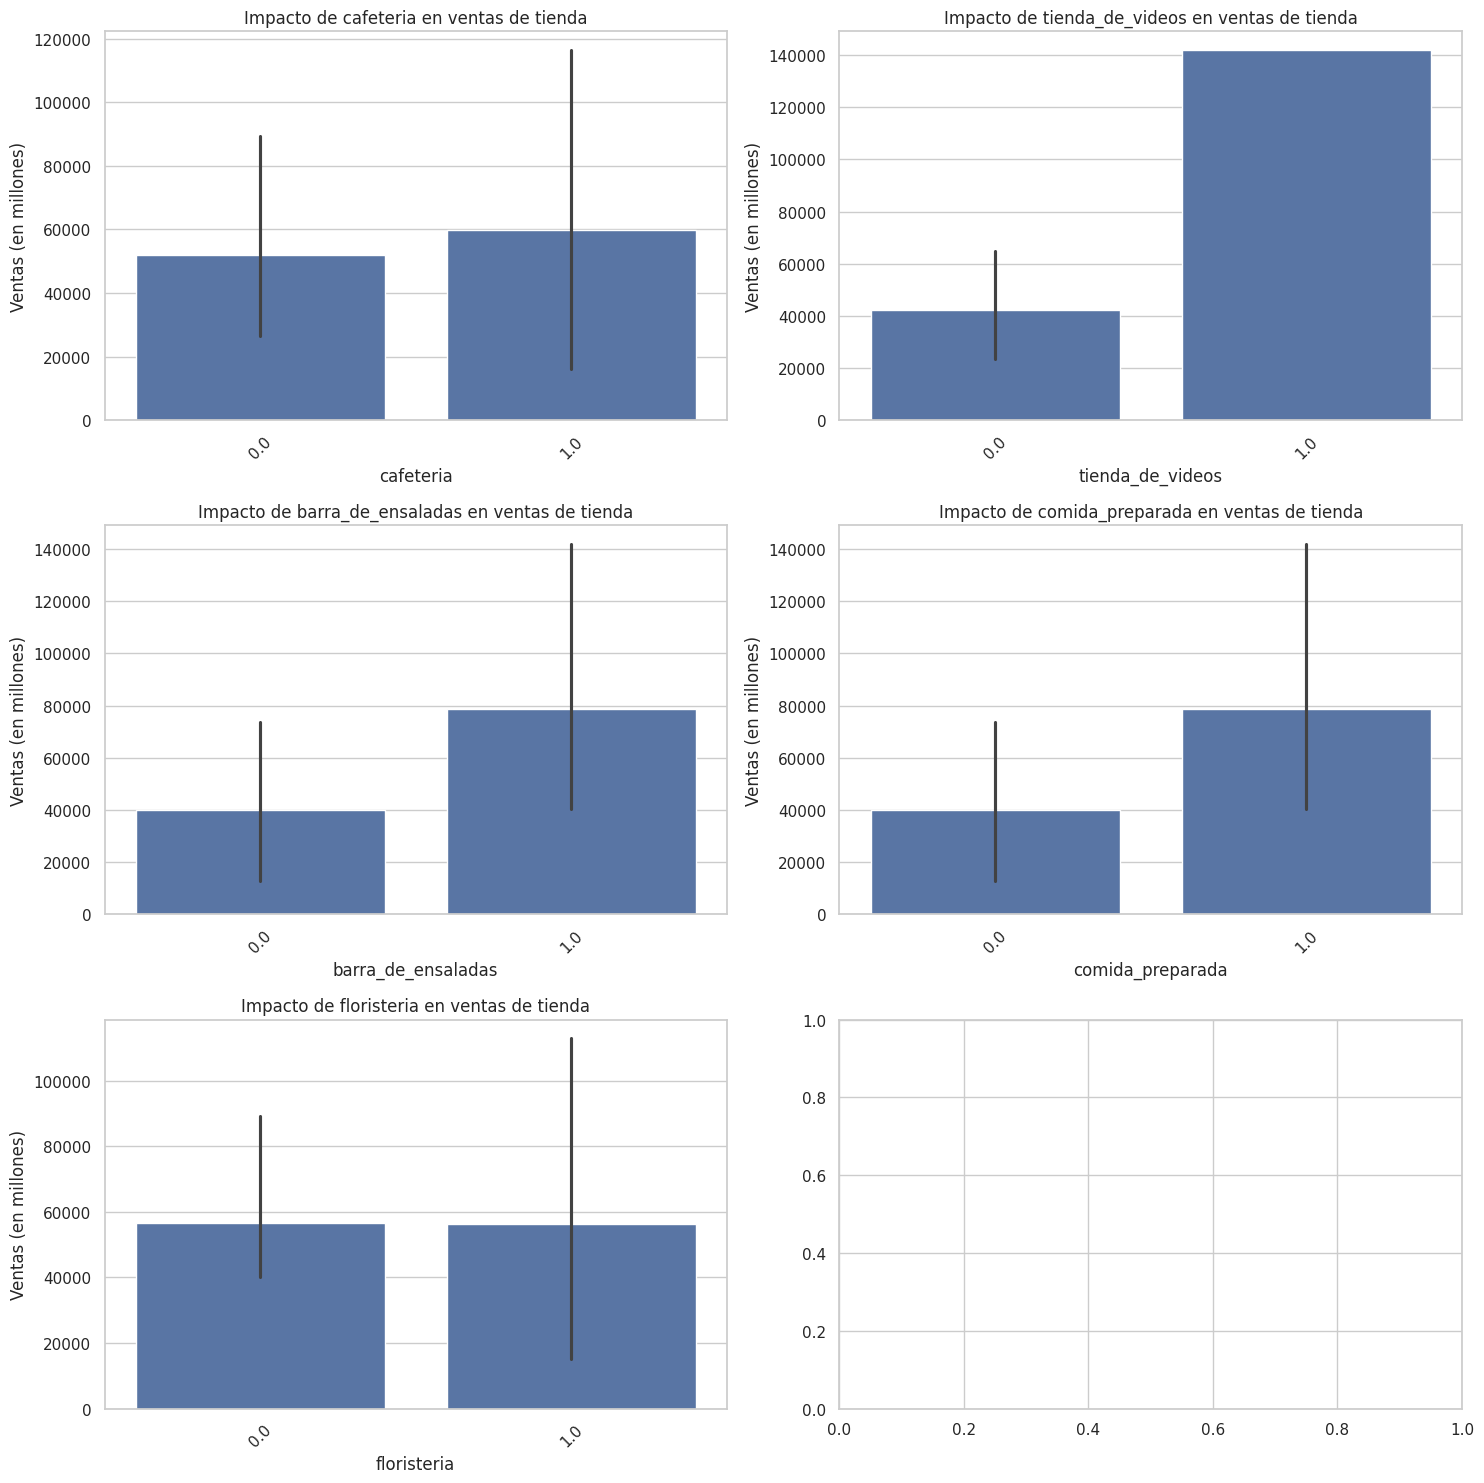

In [30]:
# Filtrar el DataFrame para incluir solo las columnas relevantes
data_rel = datos[['ventas_tienda(en millones)', 'cafeteria', 'tienda_de_videos', 'barra_de_ensaladas', 'comida_preparada', 'floristeria']]

# Agrupar los datos según cada una de estas características y calcular la suma de ventas
ventas_por_caracteristica = data_rel.groupby(['cafeteria', 'tienda_de_videos', 'barra_de_ensaladas', 'comida_preparada', 'floristeria'])['ventas_tienda(en millones)'].sum().reset_index()

# Crear los gráficos de barras para cada característica
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
axes = axes.ravel()

for i, col in enumerate(['cafeteria', 'tienda_de_videos', 'barra_de_ensaladas', 'comida_preparada', 'floristeria']):
    sns.barplot(x=col, y='ventas_tienda(en millones)', data=ventas_por_caracteristica, ax=axes[i])
    axes[i].set_title(f'Impacto de {col} en ventas de tienda')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Ventas (en millones)')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# 4.Preprocesamiento y Obtención de Features

## Estandarizacion

escoger las mejores columnas para el modelo, que puedan brindarnos la mejor informacion para **Agrupar** a los clientes.

`tipo` -> "familia de alimentos" o "grupo de alimentos". Categorización más específica de los alimentos, como frutas, verduras, lácteos, carnes, etc. (bebida, comida, no comestible)

`ventas_tienda(en millones)` -> ventas de la tienda en millones.

`ocupacion` -> tipo de ocupación del cliente.

`miembro` -> "tarjeta de socio disponible para el cliente" o "tarjeta de membresía disponible para el cliente". Tipo membresía cliente (oro, plata, bronce, no miembro).

`ingreso_anual` -> "rango de ingresos anuales según los detalles proporcionados por los clientes" o "rango de ingresos anuales de acuerdo a los detalles proporcionados por los clientes".

In [31]:
df = datos[['tipo', 'ventas_tienda(en millones)', 'ocupacion', 'miembro', 'ingreso_anual']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60428 entries, 0 to 60427
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tipo                        60428 non-null  object 
 1   ventas_tienda(en millones)  60428 non-null  float64
 2   ocupacion                   60428 non-null  object 
 3   miembro                     60428 non-null  object 
 4   ingreso_anual               60428 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 2.3+ MB


---

**Descripción de Columnas para Estandarización:**

1. **tipo_Bebida:**
   - `1` indica que el producto es una bebida.
   - `0` indica que el producto NO es una bebida.

2. **tipo_Comida:**
   - `1` indica que el producto es comestible (alimento).
   - `0` indica que el producto NO es comestible.

3. **tipo_No comestible:**
   - `1` indica que el producto NO es comestible.
   - `0` indica que el producto es comestible (bebida o comida).

4. **ocupacion:**
   - `1` indica que la ocupación es Profesional.
   - `2` indica que la ocupación es Técnico.
   - `3` indica que la ocupación es Obrero.
   - `4` indica que la ocupación es Gestión.
   - `5` indica que la ocupación es Cargo de Oficina.

5. **miembro:**
   - `1` indica que la persona no es miembro.
   - `2` indica que la persona tiene membresía Bronce.
   - `3` indica que la persona tiene membresía Plata.
   - `4` indica que la persona tiene membresía Oro.

---

**Estandarizar con dummies**

In [32]:
tipo_dumy = pd.get_dummies(df['tipo'], prefix='tipo', dtype=int)
tipo_dumy.head()

,tipo_Bebida,tipo_Comida,tipo_No comestible
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0


In [33]:
df_ = pd.concat([df, tipo_dumy], axis=1)
df_ = df_.drop(columns=['tipo'])
df_.head()

,ventas_tienda(en millones),ocupacion,miembro,ingreso_anual,tipo_Bebida,tipo_Comida,tipo_No comestible
0,7.36,Técnico,no_miembro,20000,0,1,0
1,5.52,Profesional,Plata,60000,0,1,0
2,3.68,Obrero,no_miembro,20000,0,1,0
3,3.68,Obrero,Bronce,40000,0,1,0
4,4.08,Técnico,Bronce,40000,0,1,0


**Estandarizar Variables Categóricas Ordinales**

In [34]:
# remplazar los valores organizados
reemplazos = {
    'ocupacion': {'Profesional': 1, 'Técnico': 2, 'Obrero': 3, 'Gestión': 4, 'Cargo de Oficina': 5},
    'miembro' : {'no_miembro': 1, 'Bronce': 2, 'Plata': 3, 'Oro': 4},
}
df_.replace(reemplazos, inplace=True)
df_.head()

,ventas_tienda(en millones),ocupacion,miembro,ingreso_anual,tipo_Bebida,tipo_Comida,tipo_No comestible
0,7.36,2,1,20000,0,1,0
1,5.52,1,3,60000,0,1,0
2,3.68,3,1,20000,0,1,0
3,3.68,3,2,40000,0,1,0
4,4.08,2,2,40000,0,1,0


In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
scaler = StandardScaler()
X_std = scaler.fit_transform(df_)

In [37]:
X_std

array([[ 0.23649007, -0.23068917, -1.23393279, ..., -0.31867688,
         0.62935021, -0.48670798],
       [-0.2948384 , -1.12508704,  0.99615471, ..., -0.31867688,
         0.62935021, -0.48670798],
       [-0.82616687,  0.6637087 , -1.23393279, ..., -0.31867688,
         0.62935021, -0.48670798],
       ...,
       [-0.2948384 ,  0.6637087 , -0.11888904, ..., -0.31867688,
        -1.58894043,  2.0546201 ],
       [ 0.50215431, -1.12508704, -0.11888904, ..., -0.31867688,
        -1.58894043,  2.0546201 ],
       [ 0.76781854,  0.6637087 , -0.11888904, ..., -0.31867688,
        -1.58894043,  2.0546201 ]])

# 5.Clusterización y validación

## Clusterización

buscar el mejor unumero de cluster para agrupar a los clientes.

In [38]:
from sklearn.cluster import KMeans
'''La inercia en el contexto de clustering (en este caso, usando el algoritmo KMeans)
 representa la suma de las distancias al cuadrado de cada punto de datos al
 centroide de su cluster correspondiente. En otras palabras, la inercia mide cuán
 compactos y cercanos están los puntos dentro de cada cluster.
En el contexto del código que proporcionaste, donde se calcula la inercia para
 diferentes números de clusters, la inercia se utiliza como una métrica para
 evaluar la "bondad" de ajuste del modelo KMeans con respecto al número de clusters.
La idea es que a medida que aumentamos el número de clusters, la inercia tiende
 a disminuir, ya que los clusters son más pequeños y los puntos están más cerca
 de sus respectivos centroides. Sin embargo, hay un punto donde añadir más clusters
 ya no proporciona una mejora significativa en la inercia, lo que indica que hemos
 alcanzado un número adecuado de clusters para representar los datos de manera
 eficiente. Esto se puede identificar visualmente en un gráfico de la inercia
 en función del número de clusters, buscando el punto donde se observa un "codo" en la curva.
'''
def calcular_inercia(datos):
    ''' la función devuelve una lista con 10 valores de inercia, cada uno correspondiente
     a la inercia calculada para el modelo KMeans con un número de clusters que va de 1 a 10.
     Este proceso es útil para evaluar y visualizar la disminución de la inercia con el aumento
     del número de clusters, lo que puede ayudar a determinar el número óptimo de clusters
     utilizando el método del codo (elbow method).'''

    # Crear una lista para almacenar la inercia de cada número de clusters
    '''La inercia en KMeans se refiere a la suma de los cuadrados de las distancias
     de cada punto a su centroide más cercano, lo que da una medida de la compactación de los clusters.'''
    inercia = []
    # Iterar sobre un rango de 1 a 10 (inclusive) para probar diferentes números de clusters
    for k in range(1, 11):
        # Crear un modelo KMeans con el número de clusters actual y un estado aleatorio fijo para reproducibilidad
        kmeans = KMeans(n_clusters=k, random_state=42)
        # Ajustar el modelo KMeans a los datos
        kmeans.fit(X=datos)
        # Asignar las etiquetas de los clusters a los datos
        datos['cluster'] = kmeans.labels_
        # Calcular la inercia (suma de cuadrados intra-cluster) y añadirlo a la lista de inercia
        inercia.append(kmeans.inertia_)
    # Devolver la lista de inercia para cada número de clusters probado
    return inercia

In [39]:
suma_cuadrados = calcular_inercia(df_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

In [40]:
print(f'\ninercias {suma_cuadrados}')


inercias [78722696546400.61, 22415194085676.62, 8646511339194.425, 4930660639351.886, 2201158820682.685, 883173892156.796, 350879530565.1949, 853877.2838886785, 694969.6081017052, 591394.6408314488]


**Regla del codo**

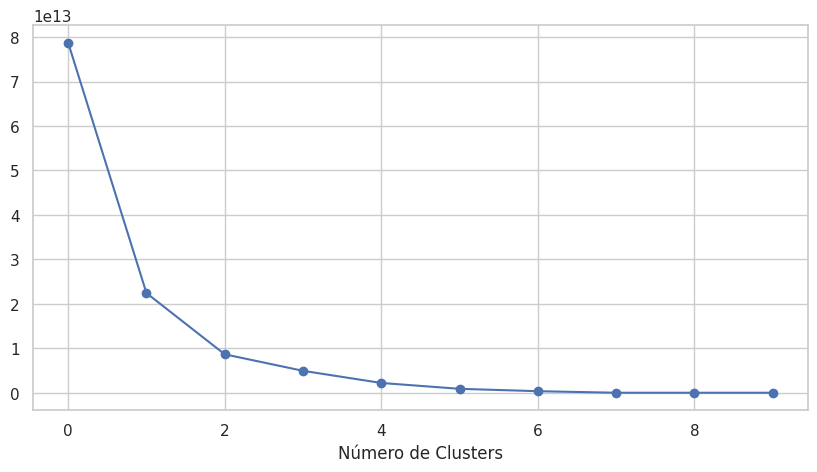

In [41]:
plt.figure(figsize=(10, 5))
plt.plot(suma_cuadrados, marker='o')
plt.xlabel('Número de Clusters')
plt.show()

In [42]:
def numero_idela_clusters(inercia):
    # Establecer los puntos inicial (x1, y1) y final (x2, y2) de la recta
    x1, y1 = 2, inercia[0]
    x2, y2 = 20, inercia[-1]

    # Inicializar una lista para almacenar las distancias
    distancias = []

    # Calcular la distancia de cada punto a la recta
    for i in range(len(inercia)):
        x0 = i + 2
        y0 = inercia[i]
        # formula
        numerador = abs((y2 - y1)*x0 - (x2 - x1)*y0 + x2*y1 - y2*x1)
        denominador = np.sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distancias.append(numerador / denominador)

    # Encontrar el índice del valor máximo en las distancias
    # y sumar 2 para obtener el número ideal de clusters
    return distancias.index(max(distancias)) + 2

In [43]:
print(f'El numero idel de clusters es: {numero_idela_clusters(suma_cuadrados)}')

El numero idel de clusters es: 4


## Validacion

## Número de clusters

**n_init**: Este parámetro controla cuántas veces se ejecutará el algoritmo KMeans con diferentes inicializaciones aleatorias de centroides. Cada ejecución se realiza con una inicialización aleatoria de los centroides, y luego se selecciona la ejecución con la inercia más baja (suma de las distancias cuadradas de cada punto al centro de su cluster más cercano) como la mejor solución. Establecer n_init en un valor mayor aumenta la probabilidad de encontrar la mejor solución global, pero también aumenta el tiempo de ejecución del algoritmo.

(n_clusters, random_state y n_init), se configura el algoritmo para formar los clusters con un número específico de clusters, asegurando que los resultados sean reproducibles y que se realicen múltiples intentos para encontrar la mejor solución global.

In [44]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

def evaluar_métricas_cluster(X_std):

    # Diccionario para almacenar los puntajes de la métrica
    puntajes = {
        "Cluster": [],
        "Silhouette": [],
        "Davies Bouldin": [],
        "Calinski Harabasz": []
    }

    # Rango de clusters que se probarán
    cluster_range = range(3, 11)

    # Iterar sobre diferentes números de clusters
    for n_cluster in cluster_range:

        # Inicializar el modelo KMeans con el número actual de clusters
        kmeans = KMeans(n_clusters=n_cluster, random_state=42, n_init=10)

        # Ajustar el modelo KMeans y predecir los clusters para los datos
        preds = kmeans.fit_predict(X_std)

        # Calcular el puntaje de la métrica para los clusters predichos y agregarlo al diccionario de puntajes
        puntajes["Cluster"].append(n_cluster)
        puntajes["Silhouette"].append(silhouette_score(X_std, preds, metric='euclidean', sample_size=300))
        puntajes["Davies Bouldin"].append(davies_bouldin_score(X_std, preds))
        puntajes["Calinski Harabasz"].append(calinski_harabasz_score(X_std, preds))

    # Convertir el diccionario de puntajes a un DataFrame de pandas
    df_puntajes = pd.DataFrame(puntajes)

    return df_puntajes


In [45]:
evaluar_métricas_cluster(X_std)

,Cluster,Silhouette,Davies Bouldin,Calinski Harabasz
0,3,0.410782,1.044854,22679.286599
1,4,0.297735,1.281459,22937.358060
2,5,0.300740,1.157687,22055.032767
3,6,0.295738,1.086301,20732.787546
4,7,0.279269,1.251595,19529.800258
5,8,0.288901,1.201917,19486.716680
6,9,0.267586,1.193099,18837.071685
7,10,0.285947,1.296382,17811.954292


yellowbrick para seleccionar el número óptimo de clusters (k) para el algoritmo K-means mediante la visualización del codo

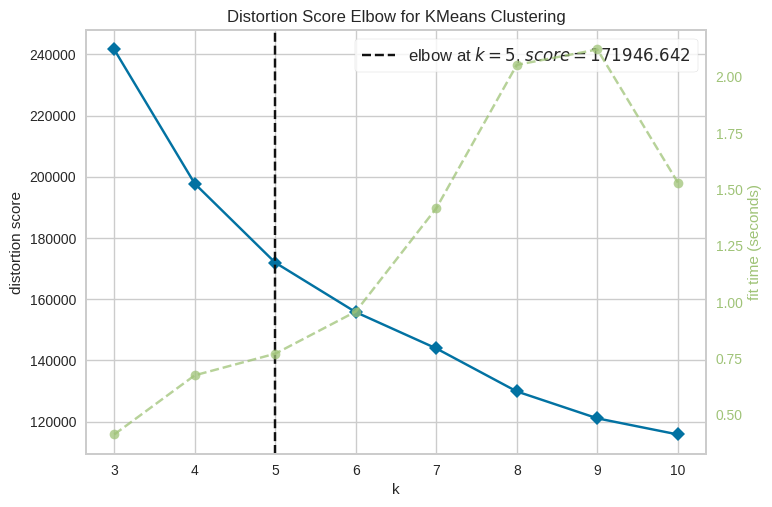

In [46]:
#Importar la visualización del codo (KElbowVisualizer) desde yellowbrick
from yellowbrick.cluster import KElbowVisualizer
import warnings

# Suprimir todas las advertencias para una salida más limpia
warnings.filterwarnings("ignore")

#Crear una instancia del modelo KMeans
model = KMeans(random_state=42)

#visualizador del codo con el modelo KMeans y se especifica el
#rango de valores para k, que va desde 3 hasta 11 clusters.
visualizer = KElbowVisualizer(model, k=(3,11))

visualizer.fit(X_std)
visualizer.show()
plt.show()

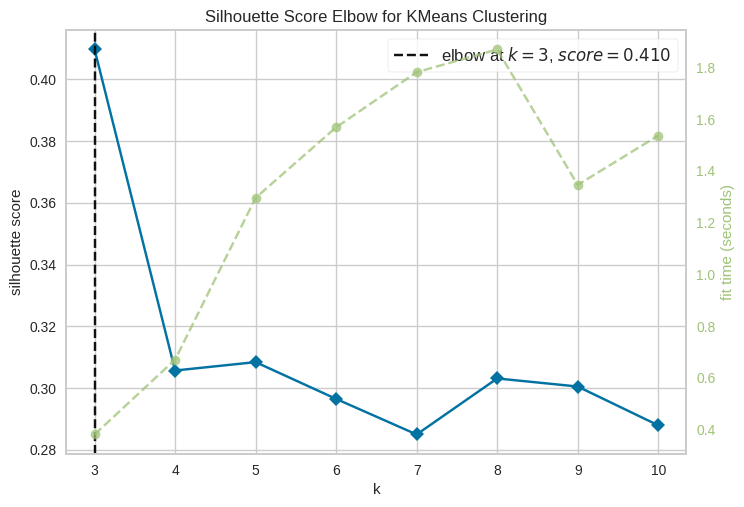

In [47]:
model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(3,11), metric='silhouette')

visualizer.fit(X_std)
visualizer.show()
plt.show()

## Estructura

**linea base**

In [48]:
# Generar números aleatorios con las mismas dimensiones que X_std
random_data = np.random.rand(*X_std.shape)

evaluar_métricas_cluster(random_data)

,Cluster,Silhouette,Davies Bouldin,Calinski Harabasz
0,3,0.099107,2.486756,6355.624404
1,4,0.091040,2.399884,5877.110644
2,5,0.084966,2.102954,5434.937408
3,6,0.105169,1.966708,5149.933100
4,7,0.084924,1.881453,4942.673329
5,8,0.097448,1.770621,4770.910446
6,9,0.079152,1.800056,4531.615998
7,10,0.101382,1.755579,4379.102809


## Estabilidad

In [49]:
# Segmentar X_std en 3 partes iguales
sets = np.array_split(X_std, 3)
# Almacenar cada fragmento en variables
set_1, set_2, set_3 = sets


In [50]:
puntajes_dict = {
    "Set": [],
    "Cluster": [],
    "Silhouette": [],
    "Davies Bouldin": [],
    "Calinski Harabasz": []
}

# Rango de clusters
clusters = range(3, 11)
for k in clusters:
    # Iterar sobre cada conjunto y aplicar el algoritmo de clustering
    for i, set_i in enumerate(sets):
        # Inicializar el modelo KMeans con el número actual de clusters
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        preds = kmeans.fit_predict(set_i)

        # Calcular el puntaje de la métrica para los clusters predichos y agregarlo al diccionario de puntajes
        puntajes_dict["Set"].append(f"Set {i+1}")
        puntajes_dict["Cluster"].append(k)
        puntajes_dict["Silhouette"].append(silhouette_score(set_i, preds, metric='euclidean', sample_size=300))
        puntajes_dict["Davies Bouldin"].append(davies_bouldin_score(set_i, preds))
        puntajes_dict["Calinski Harabasz"].append(calinski_harabasz_score(set_i, preds))

# Convertir el diccionario de puntajes a un DataFrame de pandas
df_puntajes = pd.DataFrame(puntajes_dict)

# Mostrar el DataFrame con los puntajes
print(df_puntajes)

      Set  Cluster  Silhouette  Davies Bouldin  Calinski Harabasz
0   Set 1        3    0.294902        1.413159        7899.161214
1   Set 2        3    0.406411        1.043087        7887.845941
2   Set 3        3    0.406589        1.048905        8208.602569
3   Set 1        4    0.294692        1.244319        7474.573119
4   Set 2        4    0.328307        1.275888        7869.933791
5   Set 3        4    0.318194        1.282013        7637.632519
6   Set 1        5    0.242591        1.152516        6980.698597
7   Set 2        5    0.301618        1.166076        7493.445305
8   Set 3        5    0.321548        1.160231        6960.149942
9   Set 1        6    0.301270        1.110993        6773.145170
10  Set 2        6    0.305638        1.090525        6983.752133
11  Set 3        6    0.253232        1.341879        6808.452445
12  Set 1        7    0.308027        1.036683        6772.254009
13  Set 2        7    0.302618        1.044537        6720.722949
14  Set 3 

In [51]:
df_cluster = df_puntajes.pivot(index='Cluster', columns='Set', values=['Silhouette', 'Davies Bouldin', 'Calinski Harabasz'])
df_cluster

Silhouette                     Davies Bouldin                      \
Set          Set 1     Set 2     Set 3          Set 1     Set 2     Set 3   
Cluster                                                                     
3         0.294902  0.406411  0.406589       1.413159  1.043087  1.048905   
4         0.294692  0.328307  0.318194       1.244319  1.275888  1.282013   
5         0.242591  0.301618  0.321548       1.152516  1.166076  1.160231   
6         0.301270  0.305638  0.253232       1.110993  1.090525  1.341879   
7         0.308027  0.302618  0.256230       1.036683  1.044537  1.238887   
8         0.304361  0.308095  0.301597       1.022543  1.199709  1.212941   
9         0.294094  0.314327  0.295039       1.196271  1.190499  1.197633   
10        0.281236  0.263905  0.275044       1.175722  1.317466  1.148568   

        Calinski Harabasz                            
Set                 Set 1        Set 2        Set 3  
Cluster                                              
3             7899.161214  7887.845941  8208.602569  
4             7474.573119  7869.933791  7637.632519  
5             6980.698597  7493.445305  6960.149942  
6             6773.145170  6983.752133  6808.452445  
7             6772.254009  6720.722949  6471.066754  
8             6541.724151  6581.727451  6271.221511  
9             6364.970869  6335.434336  6259.959677  
10            6068.128321  6020.358984  6081.199818

In [52]:
# Definir una función para verificar si hay diferencias mayores al 5%
def diff_greater_than_5(df_group):
    # Calcular la diferencia porcentual
    diff_percent = df_group.iloc[:, 2:].diff() / df_group.iloc[:, 2:].shift() * 100
    # Verificar si alguna diferencia es mayor al 5%
    return (diff_percent.abs() > 5).any()

# Aplicar la función por grupo (cluster)
diff_5_percent = df_puntajes.groupby('Cluster').apply(diff_greater_than_5)

# Filtrar los resultados donde hay diferencias mayores al 5%
resultados = diff_5_percent[diff_5_percent]

# Mostrar los resultados
print("Diferencias mayores al 5%:")
print(resultados)

Diferencias mayores al 5%:
        Silhouette Davies Bouldin Calinski Harabasz
Cluster                                            
3             True           True               NaN
4             True            NaN              True
5             True            NaN              True
6             True           True               NaN
7             True           True               NaN
8              NaN           True               NaN
9             True            NaN               NaN
10            True           True               NaN


## Instanciando la mejor configuración de clusters

**Elegir 6 clusters ofrece un buen equilibrio entre la cohesión interna del cluster (Silhouette y Davies-Bouldin) y la separación externa entre clusters (Calinski-Harabasz).** Este número de clusters es robusto, proporcionando clusters bien definidos sin un exceso de divisiones, lo que lo convierte en una opción sensata para agrupar los datos de manera efectiva.

Al separar los datos **X_std** en 3 set (Estabilidad) se puede observar de forma mas clara porque 6 cluster funcionarian mejor segun las metricas Silhouette Davies-Bouldin y Calinski-Harabasz.

1. **Buen Balance en Silhouette**: La métrica de Silhouette para 6 clusters muestra un valor relativamente alto, especialmente en el Set 1 (0.325911), lo que indica que los puntos están bien agrupados dentro de sus clusters y alejados de otros clusters. Aunque no es el valor más alto en todos los sets, es consistente y fuerte.

2. **Compacidad y Separación (Davies-Bouldin)**: La métrica de Davies-Bouldin es más baja en 6 clusters en comparación con varios otros valores (por ejemplo, 1.110993 en el Set 1), lo que sugiere que los clusters son compactos y están bien separados. Esto indica una buena estructura interna del clustering.

3. **Calinski-Harabasz**: Aunque 6 clusters no tiene el valor más alto en Calinski-Harabasz, sigue siendo competitivo (con valores como 6983.752133 en el Set 2). Este valor indica una buena separación entre clusters, lo cual es crucial para asegurar que los clusters no se solapen demasiado.

Vas a instanciar el algoritmo de clusterización una vez , con la configuración escogida, y vas a crear un nuevo atributo en el dataset datos_raw llamado 'cluster' para almacenar los labels de los clusters.


In [53]:
# Utilizar el mejor número de clusters seleccionado
mejor_num_clusters = 6

# Instanciar el algoritmo de clusterización con la mejor configuración
kmeans = KMeans(n_clusters=mejor_num_clusters, random_state=42, n_init=10)

# Ajustar el modelo a los datos para asignar las etiquetas de los clusters
etiquetas_clusters = kmeans.fit_predict(X_std)
df_['cluster'] = etiquetas_clusters
df_.cluster.value_counts()

,count
cluster,
5,14392
2,12993
1,11573
0,7976
3,7923
4,5571



Nota: Te sugiero que no ejecutes KMeans de nuevo, porque los clusters van a cambiar de label y color con cada ejecución del algoritmo.

6. Vas a realizar varios gráficos de dispersión para comparar las variables añadiendo una tercera dimensión con los clusters en el parámetro hue del gráfico. Trata de describir tus observaciones. Por ejemplo: En el cluster 0, de color rojo, se encuentran agrupados los clientes que gastan más dinero en productos no comestibles.

In [54]:
df_.head()

,ventas_tienda(en millones),ocupacion,miembro,ingreso_anual,tipo_Bebida,tipo_Comida,tipo_No comestible,cluster
0,7.36,2,1,20000,0,1,0,5
1,5.52,1,3,60000,0,1,0,2
2,3.68,3,1,20000,0,1,0,5
3,3.68,3,2,40000,0,1,0,5
4,4.08,2,2,40000,0,1,0,5


Agrupado por cluster

In [55]:
df_.groupby(['cluster'])[['ventas_tienda(en millones)', 'ocupacion', 'miembro', 'ingreso_anual', 'tipo_Bebida', 'tipo_Comida', 'tipo_No comestible']].sum()

,ventas_tienda(en millones),ocupacion,miembro,ingreso_anual,tipo_Bebida,tipo_Comida,tipo_No comestible
cluster,,,,,,,
0,92152.87,17678,15233,342200000,0,7976,0
1,76468.46,26173,24484,678680000,0,0,11573
2,75026.45,14137,33502,1129240000,0,12993,0
3,47941.12,30989,20772,603620000,0,7923,0
4,34178.40,12659,11781,321760000,5571,0,0
5,69494.10,34806,21527,448200000,0,14392,0


In [56]:
query = df_.query('miembro != 1')
query.groupby(['cluster'])[['ventas_tienda(en millones)', 'ocupacion', 'miembro', 'ingreso_anual', 'tipo_Bebida', 'tipo_Comida', 'tipo_No comestible']].sum()

,ventas_tienda(en millones),ocupacion,miembro,ingreso_anual,tipo_Bebida,tipo_Comida,tipo_No comestible
cluster,,,,,,,
0,66702.49,12463,13047,288120000,0,5790,0
1,59056.04,19818,21855,606840000,0,0,8944
2,73394.54,13864,33229,1098560000,0,12720,0
3,47081.35,30406,20627,589040000,0,7778,0
4,26536.92,9685,10534,288960000,4324,0,0
5,32084.50,16757,14140,282980000,0,7005,0


### Graficos

In [57]:
def plot_cluster(x, y, datos):
    sns.set(palette='muted', color_codes=True, style='whitegrid')
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=x, y=y, hue='cluster', size='cluster', sizes=(20, 200), palette='Set1', data=datos, alpha=0.5)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(f'Relación entre {x} y {y}')
    plt.show()

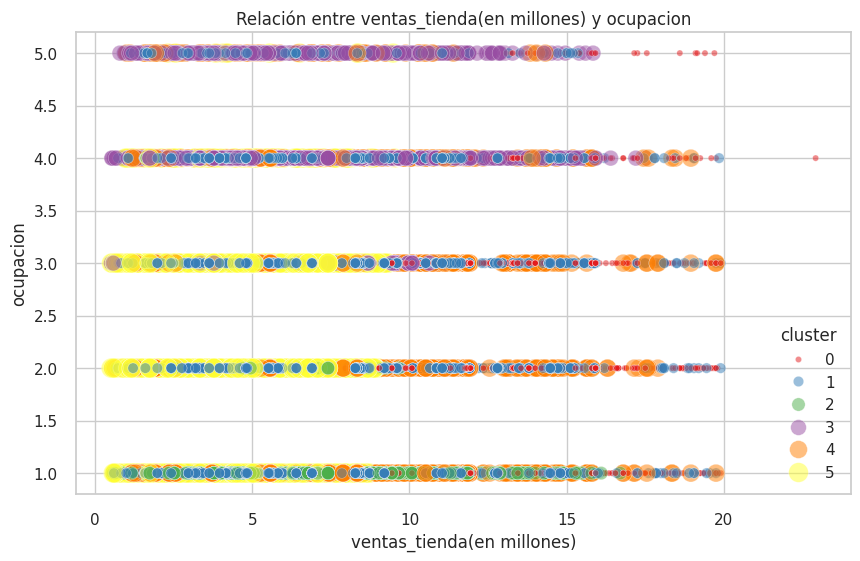

In [58]:
plot_cluster( 'ventas_tienda(en millones)', 'ocupacion',df_)

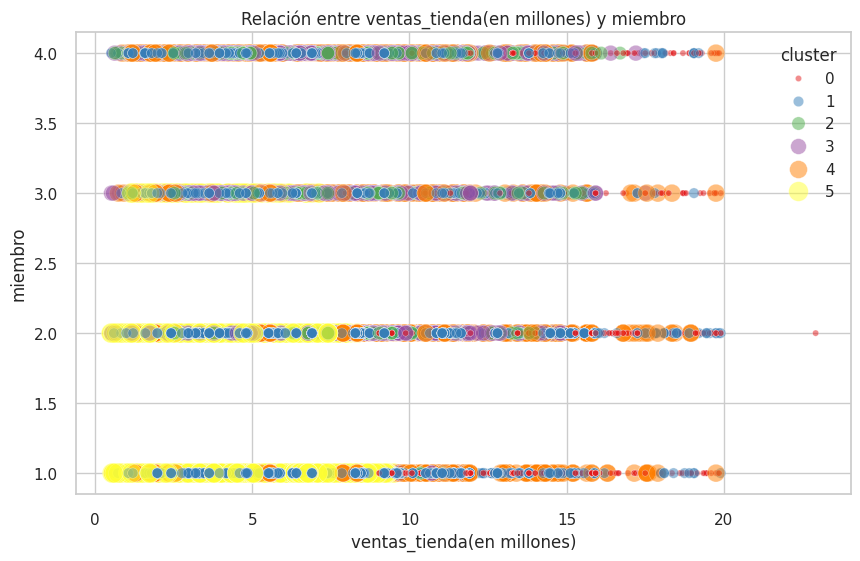

In [59]:
plot_cluster('ventas_tienda(en millones)', 'miembro', df_)

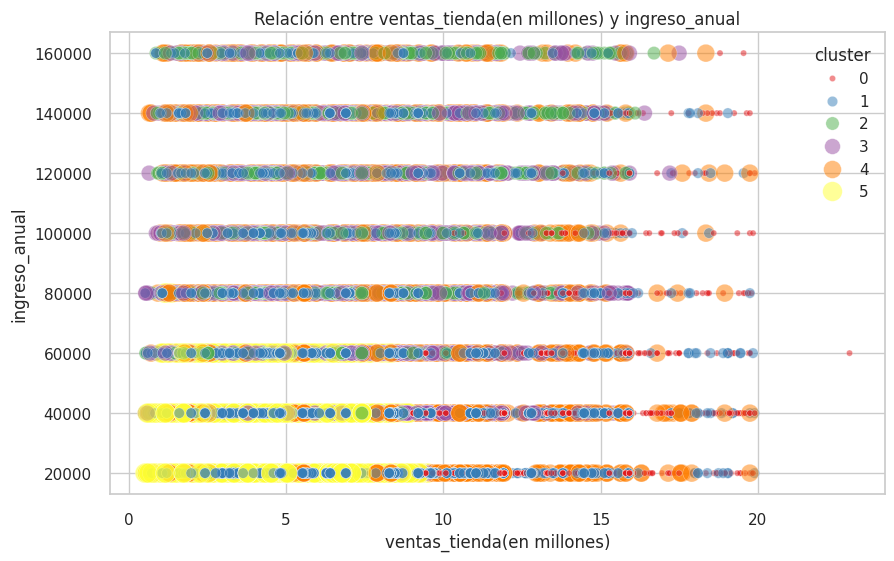

In [60]:
plot_cluster('ventas_tienda(en millones)', 'ingreso_anual', df_)

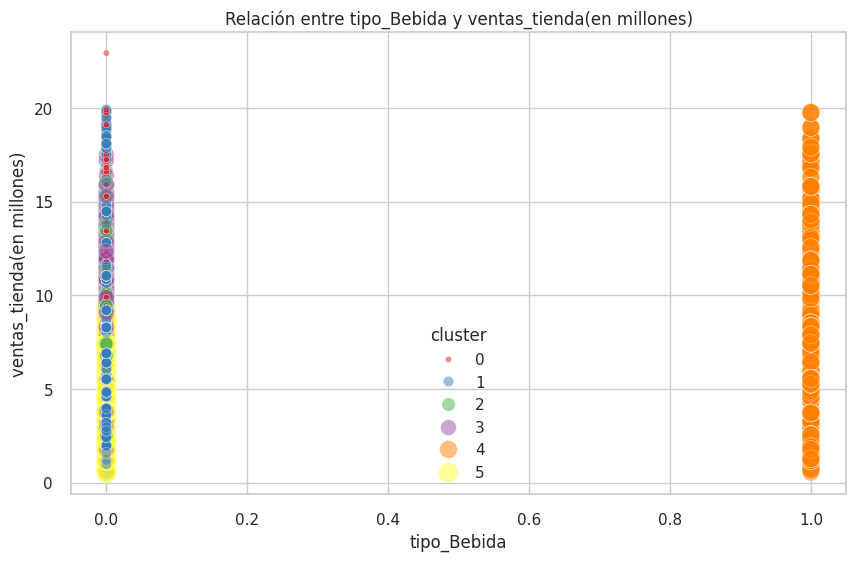

In [61]:
plot_cluster('tipo_Bebida', 'ventas_tienda(en millones)', df_)

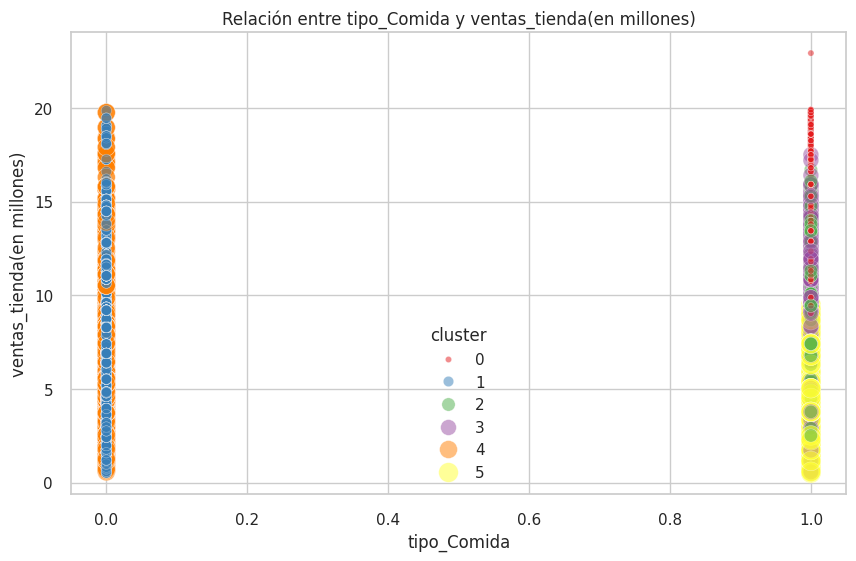

In [62]:
plot_cluster('tipo_Comida', 'ventas_tienda(en millones)', df_)

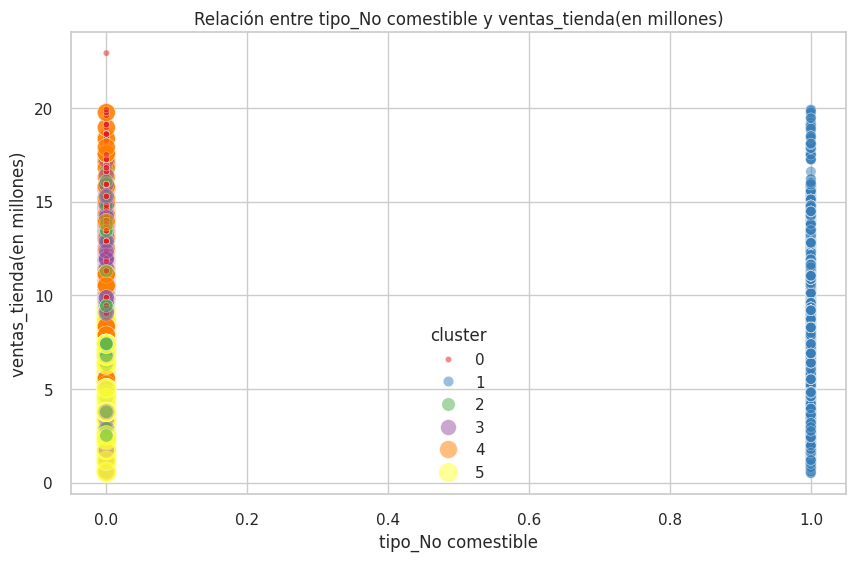

In [63]:
plot_cluster('tipo_No comestible','ventas_tienda(en millones)', df_)

### Clusters

#### Análisis por Clusters:

1. **Cluster 0**:
   - **Ventas**: 92,152.87 millones.
   - **Ocupación**: 17,678.
   - **Clientes con Membresía**: 13,047.
   - **Total Miembros**: 15,233.
   - **Ingreso Anual**: 342,200,000.
   - **Productos Comprados**: Principalmente "Comida".
   - **Descripción**: Este cluster parece estar compuesto por clientes con ingresos anuales relativamente altos, prefieren productos comestibles, tienen la mayor cantidad de ventas/compras en la tienda y un poco más del 85% cuentan con una membresía.

2. **Cluster 1**:
   - **Ventas**: 76,468.46 millones.
   - **Ocupación**: 26,173.
   - **Clientes con Membresía**: 21,855.
   - **Total Miembros**: 24,484.
   - **Ingreso Anual**: 678,680,000.
   - **Productos Comprados**: Principalmente "No comestibles".
   - **Descripción**: Este grupo tiene ingresos anuales bastante altos, ocupando la posición 2 en ingresos más altos, una preferencia marcada por productos no comestibles, y representan el segundo grupo con mayor cantidad de ventas/compras en la tienda. Un 89% de estos clientes cuentan con una membresía.

3. **Cluster 2**:
   - **Ventas**: 75,026.45 millones.
   - **Ocupación**: 14,137.
   - **Clientes con Membresía**: 33,229.
   - **Total Miembros**: 33,502.
   - **Ingreso Anual**: 1,129,240,000.
   - **Productos Comprados**: Principalmente "Comida".
   - **Descripción**: Los clientes de este cluster tienen los ingresos anuales más altos, prefieren productos comestibles y ocupan el tercer lugar en ventas/compras de la tienda. Un 99% de estos clientes cuentan con una membresía.

4. **Cluster 3**:
   - **Ventas**: 47,941.12 millones.
   - **Ocupación**: 30,989.
   - **Clientes con Membresía**: 20,627.
   - **Total Miembros**: 20,772.
   - **Ingreso Anual**: 603,620,000.
   - **Productos Comprados**: Principalmente "Comida".
   - **Descripción**: Este cluster agrupa a clientes con ingresos moderados y una preferencia por productos comestibles, compran moderadamente. Un 99% de estos clientes tienen una membresía.

5. **Cluster 4**:
   - **Ventas**: 34,178.40 millones.
   - **Ocupación**: 12,659.
   - **Clientes con Membresía**: 10,534.
   - **Total Miembros**: 11,781.
   - **Ingreso Anual**: 321,760,000.
   - **Productos Comprados**: Principalmente "Bebidas".
   - **Descripción**: Clientes con ingresos anuales más bajos, con una preferencia marcada por productos tipo bebidas, son los que menos ventas/compras tienen en la tienda. Un 89% de estos clientes cuentan con una membresía.

6. **Cluster 5**:
   - **Ventas**: 69,494.10 millones.
   - **Ocupación**: 34,806.
   - **Clientes con Membresía**: 14,140.
   - **Total Miembros**: 21,527.
   - **Ingreso Anual**: 448,200,000.
   - **Productos Comprados**: Principalmente "Comida".
   - **Descripción**: Clientes con ingresos anuales moderados, con una alta preferencia por productos comestibles (son los que más productos comestibles consumen), tienen una venta/compra moderada y solo un 65% de estos clientes cuentan con una membresía.




#### Agrupación de Clientes:
Agrupar a los clientes basádo en las características de sus compras y los ingresos anuales:

- **Ingresos altos y productos comestibles**: Cluster 2.
- **Ingresos altos y productos no comestibles**: Cluster 1.
- **Ingresos moderados y productos comestibles**: Clusters 0, 3 y 5.
- **Ingresos bajos y productos bebidas**: Cluster 4.

## **estrategias por cluster**

### **Cluster 0**
- **Descripción**: Clientes con ingresos anuales altos, prefieren productos comestibles y tienen una alta tasa de membresía (85%).
- **Estrategia:**
  - **Ofertas VIP Exclusivas**: Crear ofertas y promociones especiales para miembros con alta frecuencia de compra. Por ejemplo, descuentos en productos gourmet o paquetes especiales para cenas, solo accesibles para miembros.
  - **Programas de Fidelización Personalizados**: Ofrecer recompensas basadas en compras regulares de productos comestibles, como cupones de descuento o acceso a eventos exclusivos en la tienda.
  - **Eventos de Degustación Privados**: Organizar eventos de degustación de productos premium (vinos, quesos, etc.) para estos clientes, incentivando la compra de productos más caros.

### **Cluster 1**
- **Descripción**: Clientes con ingresos altos, prefieren productos no comestibles, segunda mayor cantidad de ventas, 89% de membresía.
- **Estrategia:**
  - **Paquetes de Regalo Premium**: Ofrecer paquetes de regalo personalizados con productos no comestibles de alta gama, ideales para ocasiones especiales. Incluir opciones de envoltura de lujo y entrega a domicilio.
  - **Beneficios por Compra Frecuente**: Implementar un sistema donde los clientes ganen puntos adicionales por la compra repetida de productos no comestibles, canjeables por descuentos en futuras compras.
  - **Servicios de Consultoría Personalizada**: Proporcionar asesoramiento personalizado sobre productos no comestibles, como dispositivos electrónicos o artículos de decoración para el hogar, con descuentos adicionales para miembros.

### **Cluster 2**
- **Descripción**: Clientes con los ingresos anuales más altos, prefieren productos comestibles, casi todos tienen membresía (99%).
- **Estrategia:**
  - **Club Gourmet Exclusivo**: Crear un club exclusivo para los miembros de este cluster, ofreciendo acceso anticipado a nuevos productos, talleres de cocina gourmet, y recetas personalizadas enviadas por correo electrónico.
  - **Compras Premium**: Ofrecer un servicio de compras premium donde se seleccionan y entregan a domicilio productos comestibles de alta calidad. Incluir la opción de suscripción para entregas regulares.
  - **Descuentos por Compras a Granel**: Ofrecer descuentos significativos por compras a granel de productos comestibles de alta gama, incentivando la compra de mayores cantidades.

### **Cluster 3**
- **Descripción**: Clientes con ingresos moderados, prefieren productos comestibles, alta tasa de membresía (99%).
- **Estrategia:**
  - **Ofertas Semanales de Productos Comestibles**: Implementar promociones semanales en productos comestibles básicos, con descuentos adicionales para miembros.
  - **Recetas Económicas**: Promover recetas económicas utilizando productos comestibles disponibles en la tienda, con descuentos en los ingredientes si se compran juntos.
  - **Eventos Comunitarios**: Organizar eventos comunitarios como clases de cocina o ferias de productos locales, donde se promuevan productos comestibles con un enfoque en la relación calidad-precio.

### **Cluster 4**
- **Descripción**: Clientes con ingresos anuales más bajos, prefieren productos tipo bebidas, alta tasa de membresía (89%).
- **Estrategia:**
  - **Promociones de Bebidas**: Ofrecer descuentos y promociones especiales en la compra de bebidas, con precios atractivos por la compra de cantidades mayores o la suscripción a un plan de entrega regular.
  - **Eventos de Cata de Bebidas**: Organizar catas de bebidas (como vinos o cervezas) con descuentos para aquellos que se suscriban a una membresía o realicen compras durante el evento.
  - **Programa de Recompensas**: Crear un programa de recompensas donde los clientes acumulen puntos por la compra de bebidas, canjeables por descuentos o productos exclusivos.

### **Cluster 5**
- **Descripción**: Clientes con ingresos anuales moderados, prefieren productos comestibles, menor tasa de membresía (65%).
- **Estrategia:**
  - **Incentivos para la Membresía**: Ofrecer beneficios atractivos para los clientes que aún no tienen membresía, como descuentos iniciales o acceso a promociones exclusivas.
  - **Descuentos en Productos Comestibles Populares**: Implementar descuentos en productos comestibles más comprados, incentivando la compra frecuente y la renovación de la membresía.
  - **Paquetes de Alimentos Esenciales**: Crear paquetes de alimentos esenciales a precios accesibles, dirigidos a este grupo que tiene un presupuesto más limitado. Ofrecer descuentos adicionales para miembros.
